<a href="https://www.kaggle.com/code/faressayah/minimizing-churn-rate-of-an-audiobook-app-users?scriptVersionId=117767781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Case Study: Audiobook app

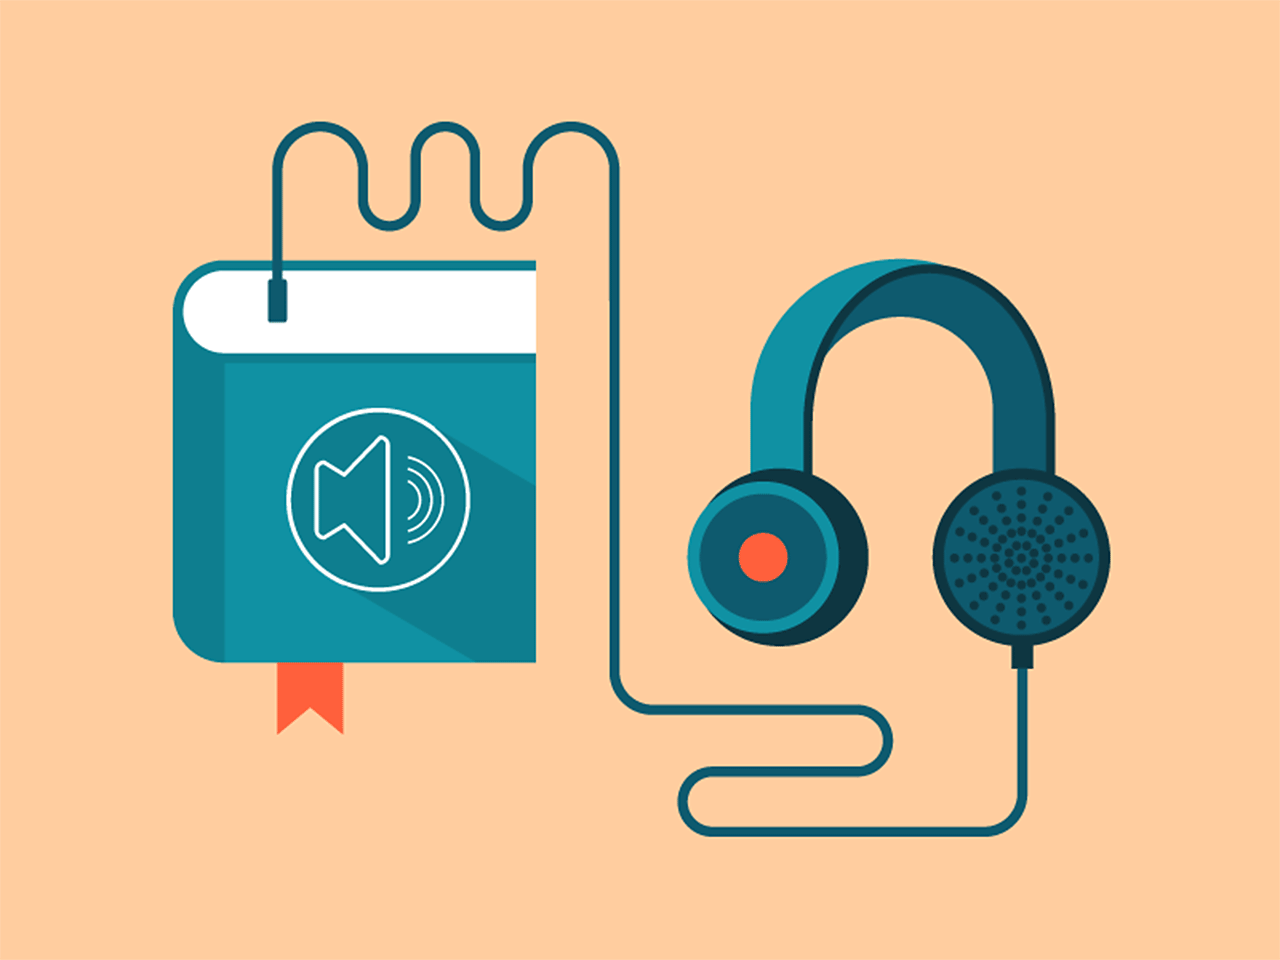

You are given data from an Audiobook app. Logically, it relates only to the audio versions of books.  We want to create a machine learning model based on our available data that can predict if a customer will buy again from the Audiobook company.

- The data is from an audiobook app, each customer in the database has make a purchase at least once.
- The main idea is that the company shouldn't spend there money targeting individuals who are unlikely to come back.
- If we focus on client who are more likely to convert again we'll get increase the sales and profitability figures.

The model must show us which are the most important metrics for a client to come back.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float_format", "{:.2f}".format)

In [2]:
data = pd.read_csv("/kaggle/input/audiobook-app-data/audiobook_data_2.csv", index_col=0)
data.head()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
994,1620.00,1620,19.73,19.73,1,10.00,0.99,1603.80,5,92,0
1143,2160.00,2160,5.33,5.33,0,8.91,0.00,0.00,0,0,0
2059,2160.00,2160,5.33,5.33,0,8.91,0.00,0.00,0,388,0
2882,1620.00,1620,5.96,5.96,0,8.91,0.42,680.40,1,129,0
3342,2160.00,2160,5.33,5.33,0,8.91,0.22,475.20,0,361,0


# 1. Getting aquainted with the dataset

- `ÌD`: is like a name.

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.

- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).

- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

The data was gathered from the audiobook app, the input data represents `2 years` worth of engagement. We are doing supervised learning so we need `target`. We took extra `6 month` to check if the user converted or not. 1 if the customer buys in the next 6 months, 0 if the customer didn't.

- `target`: 1 if the customer bought again in the last 6 months of data. 0 if the customer did not buy again.

# 2. Exploratory Data Analysis

In [3]:
data.describe()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
count,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00,14084.00
mean,1591.28,1678.61,7.10,7.54,0.16,8.91,0.13,189.89,0.07,61.94,0.16
std,504.34,654.84,4.93,5.56,0.37,0.64,0.24,371.08,0.47,88.21,0.37
min,216.00,216.00,3.86,3.86,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1188.00,1188.00,5.33,5.33,0.00,8.91,0.00,0.00,0.00,0.00,0.00
50%,1620.00,1620.00,5.95,6.07,0.00,8.91,0.00,0.00,0.00,11.00,0.00
75%,2160.00,2160.00,8.00,8.00,0.00,8.91,0.13,194.40,0.00,105.00,0.00
max,2160.00,7020.00,130.94,130.94,1.00,10.00,1.00,2160.00,30.00,464.00,1.00


In [4]:
data.isnull().sum()

Book_length(mins)_overall          0
Book_length(mins)_avg              0
Price_overall                      0
Price_avg                          0
Review                             0
Review10/10                        0
Completion                         0
Minutes_listened                   0
Support_Request                    0
Last_Visited_mins_Purchase_date    0
Target                             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14084 entries, 994 to 251
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Book_length(mins)_overall        14084 non-null  float64
 1   Book_length(mins)_avg            14084 non-null  int64  
 2   Price_overall                    14084 non-null  float64
 3   Price_avg                        14084 non-null  float64
 4   Review                           14084 non-null  int64  
 5   Review10/10                      14084 non-null  float64
 6   Completion                       14084 non-null  float64
 7   Minutes_listened                 14084 non-null  float64
 8   Support_Request                  14084 non-null  int64  
 9   Last_Visited_mins_Purchase_date  14084 non-null  int64  
 10  Target                           14084 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.3 MB


## `Book_length(mins)_overall` & `Book_length(mins)_avg`

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

In [6]:
data['Book_length(mins)_overall'].value_counts()

2160.00    4712
1620.00    4149
1188.00    2851
648.00      712
1080.00     567
324.00      300
540.00      115
1404.00     112
1890.00     110
1674.00      98
1134.00      52
216.00       51
1656.00      27
1476.00      23
1350.00      21
756.00       21
918.00       15
1332.00      14
1242.00      13
864.00       13
1296.00      10
1152.00       8
1116.00       7
972.00        7
486.00        6
1377.00       5
1368.00       5
1512.00       5
1224.00       5
1044.00       4
432.00        4
594.00        4
1008.00       3
702.00        3
684.00        3
504.00        2
576.00        2
1161.00       2
1269.00       2
928.80        1
1252.80       1
1440.00       1
1339.20       1
990.00        1
378.00        1
945.00        1
828.00        1
1431.00       1
720.00        1
612.00        1
1062.00       1
1170.00       1
810.00        1
1260.00       1
1058.40       1
270.00        1
1231.20       1
999.00        1
1002.86       1
1098.00       1
Name: Book_length(mins)_overall, dtype: 

In [7]:
def book_length(length):
    if length > 1200:
        return 1
    else:
        return 0
    
data['purchases_hour_>3h'] = data['Book_length(mins)_overall'].apply(book_length)

In [8]:
data['Book_length(mins)_avg'].apply(book_length).value_counts()

1    9480
0    4604
Name: Book_length(mins)_avg, dtype: int64

In [9]:
data['purchases_hour_>3h'].value_counts()

1    9317
0    4767
Name: purchases_hour_>3h, dtype: int64

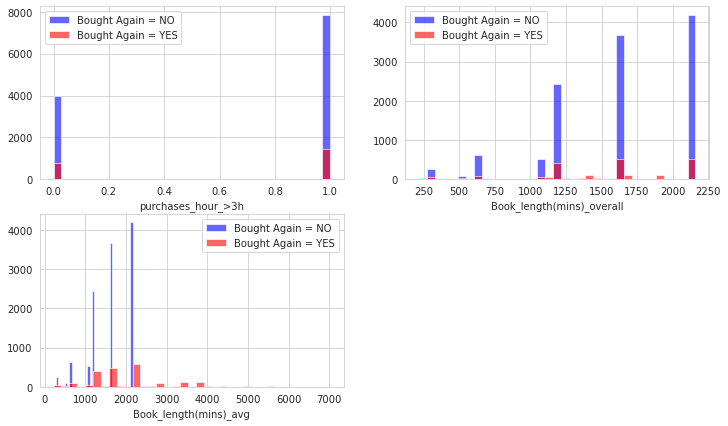

In [10]:
columns = ['purchases_hour_>3h', 'Book_length(mins)_overall', 'Book_length(mins)_avg']
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Price_overall` & `Price_avg`

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

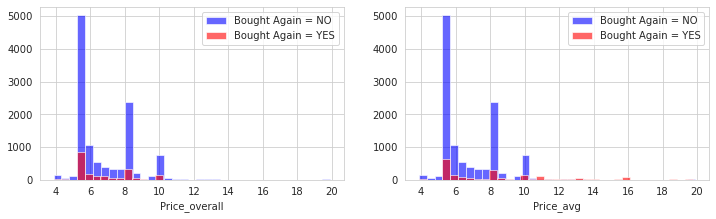

In [11]:
columns = ["Price_overall", "Price_avg"]
plt.figure(figsize=(12, 7))
df = data[(data.Price_overall < 20) & (data.Price_avg < 20)]

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Review` & `Review10/10`
- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

In [12]:
print(data[data['Review'] == 0].Target.value_counts(normalize=True))
print(data[data['Review'] == 1].Target.value_counts(normalize=True))

0   0.84
1   0.16
Name: Target, dtype: float64
0   0.83
1   0.17
Name: Target, dtype: float64


In [13]:
data['Review10/10'].value_counts()

8.91     11616
10.00     1284
8.00       404
9.00       381
7.00       157
6.00       104
5.00        43
9.50        21
4.00        18
8.50        11
1.00        10
3.00         9
2.00         7
6.50         5
8.67         2
7.50         2
5.50         2
8.33         2
4.50         1
9.67         1
9.40         1
1.50         1
6.67         1
7.75         1
Name: Review10/10, dtype: int64

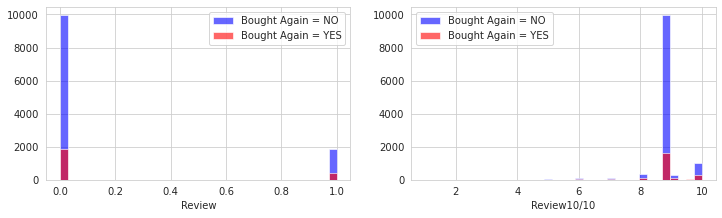

In [14]:
columns = ["Review", "Review10/10"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Minutes_listened` & `Completion`
- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.
- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

In [15]:
def listened_to_books(minutes):
    if minutes > 0.0:
        return 0
    else:
        return 1
data['listened_to_books'] = data.Minutes_listened.apply(listened_to_books)

In [16]:
def completion_state(minutes):
    if minutes > 0.5:
        return 1
    else:
        return 0
data['completion_state'] = data.Completion.apply(completion_state)

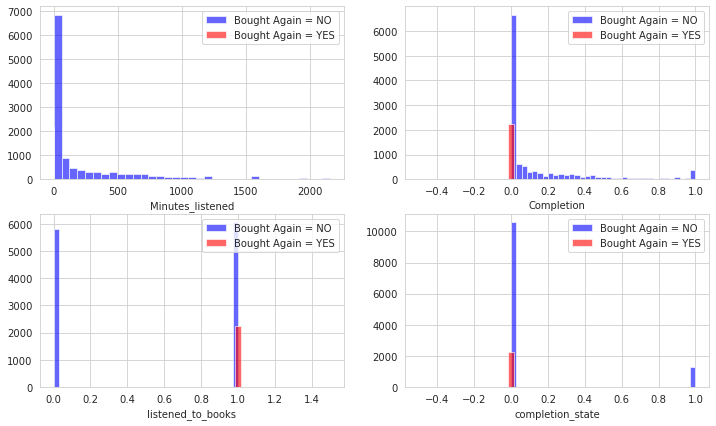

In [17]:
columns = ["Minutes_listened", "Completion", "listened_to_books", "completion_state"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [18]:
data.drop('Minutes_listened', axis=1, inplace=True)

## `Support_Request` & `Last_Visited_mins_Purchase_date`

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).
- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

In [19]:
def asked_for_request(request):
    if request == 0:
        return 0
    else:
        return 1
    
data["asked_for_request"] = data.Support_Request.apply(asked_for_request)

In [20]:
def acc_purchases(purchase):
    if purchase == 0:
        return 0
    else:
        return 1
data['acc_purchases'] = data.Last_Visited_mins_Purchase_date.apply(acc_purchases)

In [21]:
data.Last_Visited_mins_Purchase_date.value_counts()

0      5493
1       357
2       198
3       165
5       140
       ... 
369       1
367       1
339       1
379       1
363       1
Name: Last_Visited_mins_Purchase_date, Length: 371, dtype: int64

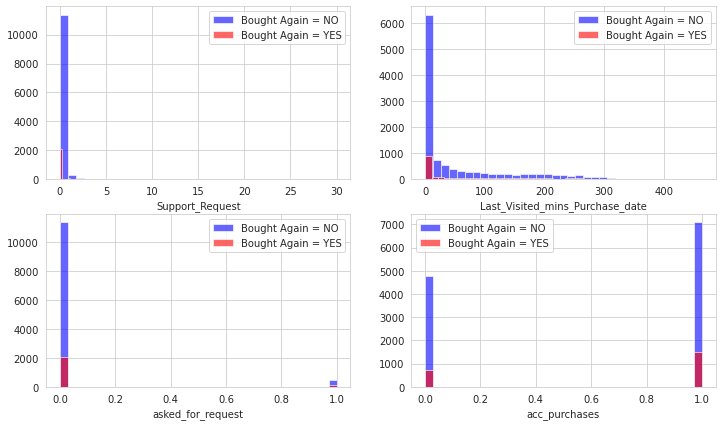

In [22]:
columns = ["Support_Request", "Last_Visited_mins_Purchase_date", "asked_for_request", "acc_purchases"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [23]:
data.drop('Support_Request', axis=1, inplace=True)

In [24]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

0    11847
1     2237
Name: Target, dtype: int64
5.295932051855163


It is important to notice that our `target` variable is inbabalanced. We have only `2237` user who convert again in the `6 month` period. The data need to be balanced.

<AxesSubplot:>

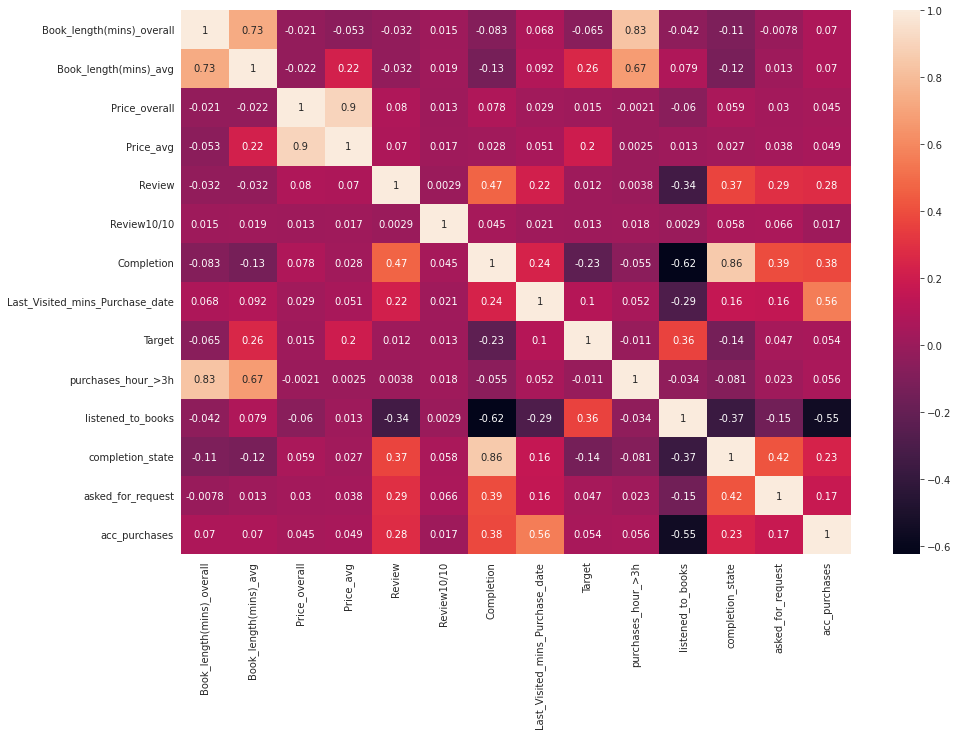

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

# 3. Data Pre-processing

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code which is not that hard but refers to data engineering more than machine learning.

- Handling categorical features

- Balance the dataset. 

### Check Duplicate columns and Rows

In [26]:
print(f"Data shape before removing duplicates: {data.shape}")

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(f"Data shape after removing duplicates: {data.shape}")

Data shape before removing duplicates: (14084, 14)
Data shape after removing duplicates: (9350, 14)


In [27]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

0.00    7548
1.00    1802
Name: Target, dtype: int64
4.188679245283019


### Handling categorical features

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = data.drop('Target', axis=1)
y = data.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dummies = [
    column for column in data.drop('Target', axis=1).columns if data[column].nunique() <= 10
]
numeric = [
    column for column in data.drop('Target', axis=1).columns if data[column].nunique() > 10
]

ohe = OneHotEncoder()
std_scaler = StandardScaler()

ct = make_column_transformer(
    (ohe, dummies),
    (std_scaler, numeric),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (6545, 19)
Test shape: (2805, 19)


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    
def plot_graphs(model):    
    precisions, recalls, thresholds = precision_recall_curve(y_test, model.predict(X_test))
    plt.figure(figsize=(14, 25))
    plt.subplot(4, 2, 1)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

    plt.subplot(4, 2, 2)
    plt.plot(precisions, recalls)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.title("PR Curve: precisions/recalls tradeoff");

    plt.subplot(4, 2, 3)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    plot_roc_curve(fpr, tpr)

# 4. Model Building

# 4. 1. Logistic Regression 

In [31]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l2')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5234   37]
 [ 632  642]]
ACCURACY SCORE:
0.8978
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    0.89    0.95      0.90       0.92          0.90
recall       0.99    0.50      0.90       0.75          0.90
f1-score     0.94    0.66      0.90       0.80          0.88
support   5271.00 1274.00      0.90    6545.00       6545.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[2256   21]
 [ 271  257]]
ACCURACY SCORE:
0.8959
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision    0.89   0.92      0.90       0.91          0.90
recall       0.99   0.49      0.90       0.74          0.90
f1-score     0.94   0.64      0.90       0.79          0.88
support   2277.00 528.00      0.90    2805.00       2805.00


### Cross Validation Score for Logistic Regression

In [32]:
scores = cross_val_score(lr_clf, X, y, cv=5, scoring='f1')
print(f"Logistic Regression F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

Logistic Regression F1_score: 65.08% +/- (1.37)


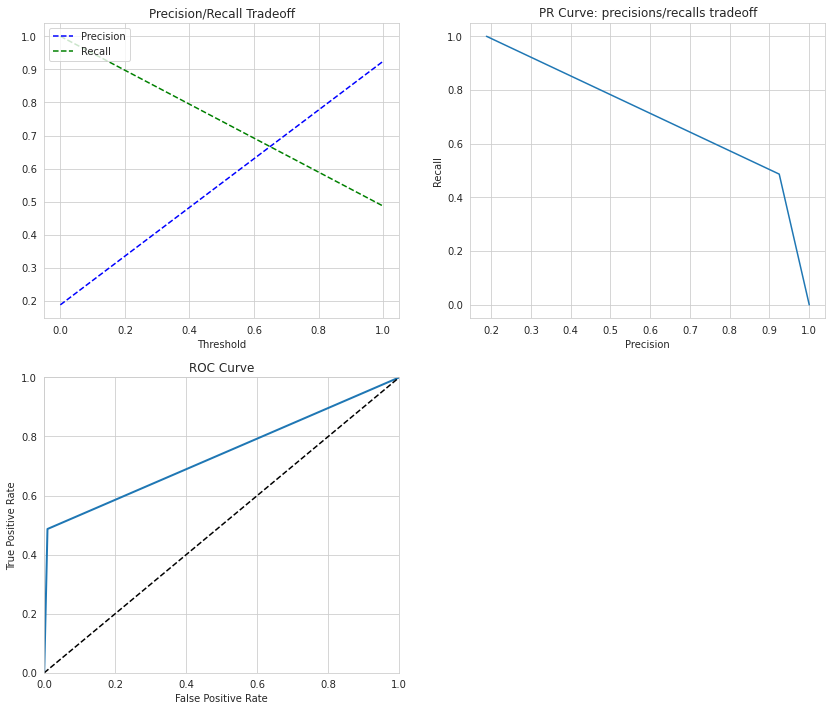

In [33]:
plot_graphs(lr_clf)

In [34]:
scores_dict = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train, lr_clf.predict(X_train)),
        'Test': accuracy_score(y_test, lr_clf.predict(X_test)),
        'cv_f1_score': scores.mean()
    },
}

# 4. 2. Random Forest Classifier

In [35]:
zeros = (y_train.value_counts()[0] / y_train.shape)[0]
ones = (y_train.value_counts()[1] / y_train.shape)[0]

print(f"Doesn't purchase again users Rate: {zeros * 100:.2f}%")
print(f"Purchase again users Rate: {ones * 100 :.2f}%")

Doesn't purchase again users Rate: 80.53%
Purchase again users Rate: 19.47%


In [36]:
rf_clf = RandomForestClassifier(n_estimators=1500, oob_score=True)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5237   34]
 [  98 1176]]
ACCURACY SCORE:
0.9798
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    0.98    0.97      0.98       0.98          0.98
recall       0.99    0.92      0.98       0.96          0.98
f1-score     0.99    0.95      0.98       0.97          0.98
support   5271.00 1274.00      0.98    6545.00       6545.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[2107  170]
 [ 179  349]]
ACCURACY SCORE:
0.8756
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision    0.92   0.67      0.88       0.80          0.87
recall       0.93   0.66      0.88       0.79          0.88
f1-score     0.92   0.67      0.88       0.80          0.88
support   2277.00 528.00      0.88    2805.00       2805.00


In [37]:
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True)

param_grid = {
    'n_estimators':[100, 500, 1000, 1500],
    'max_depth':[3, 5, 7, 10, 15, None], 
    'min_samples_split':[2, 3, 10], 
    'min_samples_leaf':[1, 3, 5, 7, 10], 
    'criterion':["gini", "entropy"]
}

rf_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)
rf_cv.fit(X_train, y_train)

best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5258   13]
 [ 547  727]]
ACCURACY SCORE:
0.9144
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    0.91    0.98      0.91       0.94          0.92
recall       1.00    0.57      0.91       0.78          0.91
f1-score     0.95    0.72      0.91       0.84          0.91
support   5271.00 1274.00      0.91    6545.00       6545.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[2263   14]
 [ 230  298]]
ACCURACY SCORE:
0.9130
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision    0.91   0.96      0.91       0.93          0.92
recall       0.99   0.56      0.91       0.78          0.91
f1-score     0.95   0.71      0.91       0.83          0.90
support   2277.00 528.00      0.91    2805.00

### Cross Validation Score for Random Forest Classifier

In [38]:
scores = cross_val_score(rf_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.69535284 0.73920553 0.69518717 0.69026549 0.70588235]
Random Forest F1_score: 70.52% +/- (1.78)


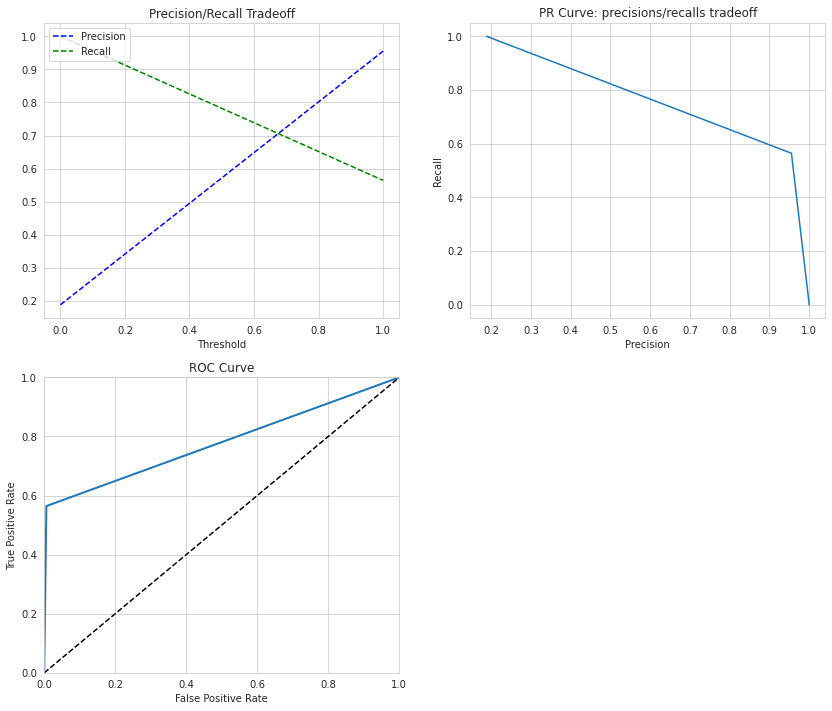

In [39]:
plot_graphs(rf_clf)

In [40]:
scores_dict['Random Forest'] = {
    'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
    'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    'cv_f1_score': scores.mean()
}

# 4. 3. XGBoost Classifier

In [41]:
xgb_clf = XGBClassifier(
    learning_rate=0.5, 
    n_estimators=150, 
    base_score=0.3
)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5233   38]
 [ 214 1060]]
ACCURACY SCORE:
0.9615
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    0.96    0.97      0.96       0.96          0.96
recall       0.99    0.83      0.96       0.91          0.96
f1-score     0.98    0.89      0.96       0.94          0.96
support   5271.00 1274.00      0.96    6545.00       6545.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[2151  126]
 [ 189  339]]
ACCURACY SCORE:
0.8877
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision    0.92   0.73      0.89       0.82          0.88
recall       0.94   0.64      0.89       0.79          0.89
f1-score     0.93   0.68      0.89       0.81          0.88
support   2277.00 528.00      0.89    2805.00       2805.00


In [42]:
xgb_clf = XGBClassifier(
    learning_rate=0.5, 
    n_estimators=150, 
    base_score=0.3
)

hyperparameter_grid = {
    'colsample_bytree': [ 0.5, 0.75, 0.85, 0.9, 1], 
    'colsample_bylevel': [ 0.5, 0.75, 0.85, 0.9, 1],
    'colsample_bynode': [ 0.5, 0.75, 0.85, 0.9, 1],
    'learning_rate' : [0.01, 0.5, 0.1], 
    'n_estimators': [100, 350, 500],
    'min_child_weight' : [2, 3, 5, 10],
    'max_depth': [3, 5, 10, 15], 
    'base_score' : [0.1, 0.5, 0.9]
}

xgb_cv = GridSearchCV(
    xgb_clf, 
    hyperparameter_grid, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=3
)

xgb_cv.fit(X_train, y_train)

best_params = xgb_cv.best_params_
print(f"Best parameters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
Best parameters: {'colsample_bylevel': 0.9, 'colsample_bynode': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'min_child_weight': 5}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5245   26]
 [ 520  754]]
ACCURACY SCORE:
0.9166
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    0.91    0.97      0.92       0.94          0.92
recall       1.00    0.59      0.92       0.79          0.92
f1-score     0.95    0.73      0.92       0.84          0.91
support   5271.00 1274.00      0.92    6545.00       6545.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[2245   32]
 [ 221  307]]
ACCURACY SCORE:
0.9098
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision    0.91   0.91      0.91       0.91          0.91
recall       0.99   0.58      0.91       0.78          0.91
f1-score     0.95   0.71      0.91       0.83          0.90
support   2277.00 528.00      0.91    2

### Cross Validation Score for XGBoost Classifier

In [43]:
scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.69230769 0.62973761 0.69352014 0.6993007  0.70671378]
XGBoost F1_score: 68.43% +/- (2.78)


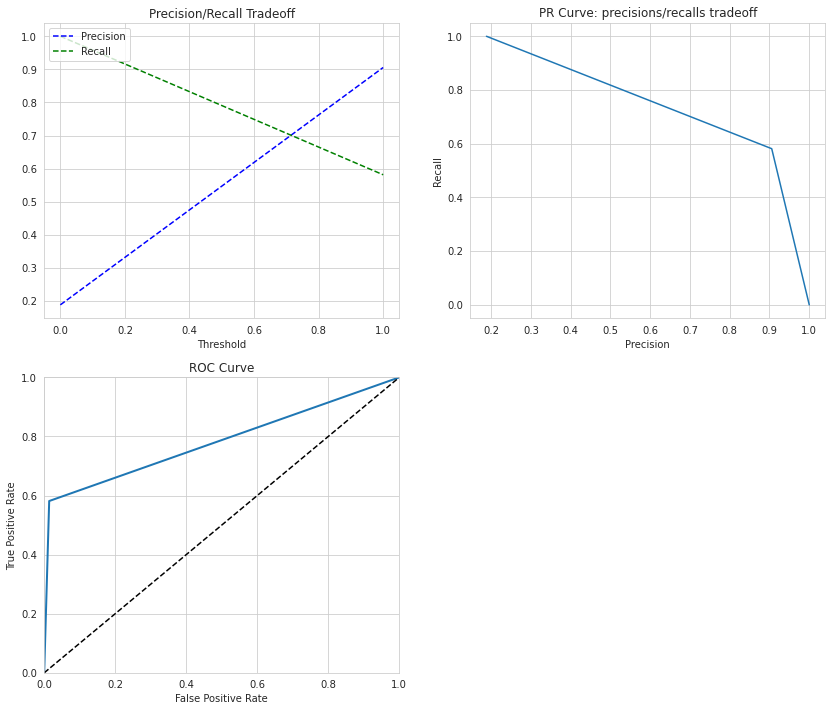

In [44]:
plot_graphs(xgb_clf)

In [45]:
scores_dict['XGBoost'] = {
    'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
    'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    'cv_f1_score': scores.mean()
}

# 4. 4. Support Vector Machine

In [46]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5257   14]
 [ 600  674]]
ACCURACY SCORE:
0.9062
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    0.90    0.98      0.91       0.94          0.91
recall       1.00    0.53      0.91       0.76          0.91
f1-score     0.94    0.69      0.91       0.82          0.89
support   5271.00 1274.00      0.91    6545.00       6545.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[2267   10]
 [ 251  277]]
ACCURACY SCORE:
0.9070
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision    0.90   0.97      0.91       0.93          0.91
recall       1.00   0.52      0.91       0.76          0.91
f1-score     0.95   0.68      0.91       0.81          0.90
support   2277.00 528.00      0.91    2805.00       2805.00


In [47]:
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'gamma': [0.01, 0.1, 1, 10, 100],
#     'kernel': ['rbf', 'poly', 'linear']
# }

# svm_cv = GridSearchCV(SVC(), param_grid, scoring='f1', verbose=1, cv=3, n_jobs=-1)
# svm_cv.fit(X_train, y_train)

# best_params = svm_cv.best_params_
# print(f"Best params: {best_params}")

# svm_clf = SVC(**best_params)
# svm_clf.fit(X_train, y_train)
# evaluate(svm_clf, X_train, X_test, y_train, y_test)

## Cross-Validation Score for Support Vector Machine

In [48]:
scores = cross_val_score(svm_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"Support Vector Machine F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.50622407 0.52156057 0.51546392 0.45396146 0.41666667]
Support Vector Machine F1_score: 48.28% +/- (4.08)


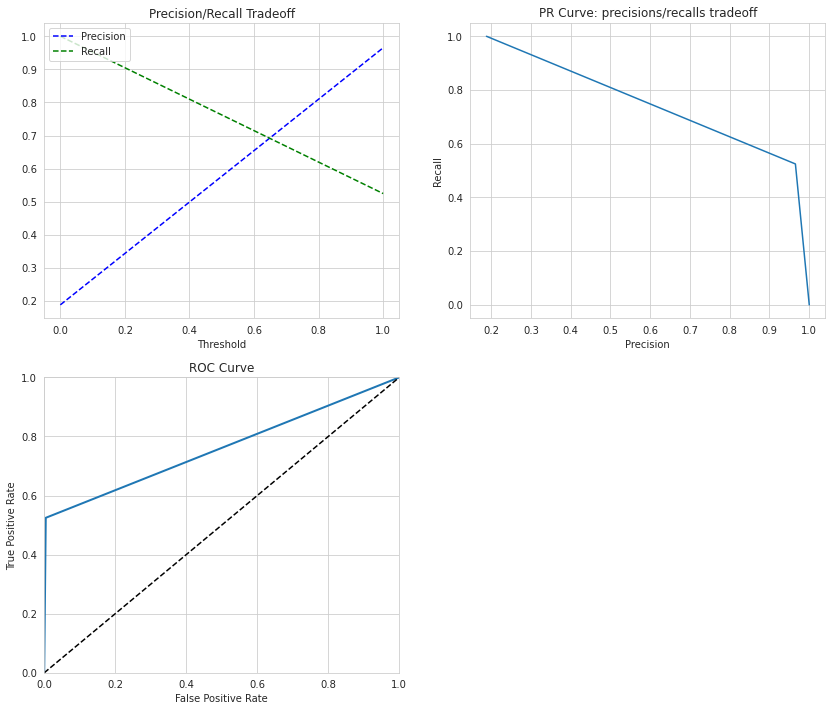

In [49]:
plot_graphs(svm_clf)

In [50]:
scores_dict['Support Vector Machine'] = {
    'Train': accuracy_score(y_train, svm_clf.predict(X_train)),
    'Test': accuracy_score(y_test, svm_clf.predict(X_test)),
    'cv_f1_score': scores.mean()
}

# 5. Comparing Machine Learning Models

In [51]:
ml_models = {
    'Logistic Regression': lr_clf, 
    'Random Forest': rf_clf, 
    'XGboost': xgb_clf,
    'Support Vector Machine': svm_clf
}
for model in ml_models:
    print(f"{model.upper()} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC REGRESSION roc_auc_score: 0.739
RANDOM FOREST roc_auc_score: 0.779
XGBOOST roc_auc_score: 0.784
SUPPORT VECTOR MACHINE roc_auc_score: 0.760


<AxesSubplot:>

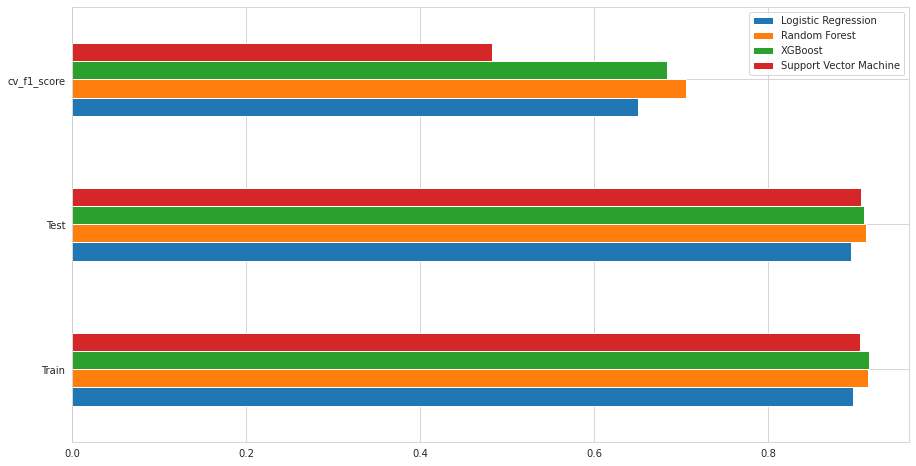

In [52]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))